<a href="https://colab.research.google.com/github/neojarma/coral-classification/blob/main/coral_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense,Flatten
import pathlib

In [ ]:
# import datasets

data_dir = pathlib.Path('datasets')

In [ ]:
rmdir datasets/.ipynb_checkpoints

In [ ]:
# define image height and width
img_height, img_width = 150,150

# define batch size
batch_size=32

# split data 80% training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# split data 20% validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1848 files belonging to 5 classes.
Using 1479 files for training.
Found 1848 files belonging to 5 classes.
Using 369 files for validation.


In [ ]:
# print all classnames
class_names = train_ds.class_names
print(class_names)

['acropora_clathrata', 'acropora_florida', 'cyphastrea_microphthalma', 'diploastrea_heliopora', 'pachyseris_speciosa']


In [ ]:
# creating model with ResNet50 keras architecture
resnet_model = Sequential()

# Instantiates the ResNet50 architecture.
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_height,img_width,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

# add all necessary value into resnet model 
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [ ]:
# print model summary
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 23,850,629
Trainable params: 262,917
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# compile the model with adam optimizer

resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# begin training

epochs = 10
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
47/47 [==============================] - 135s 3s/step - loss: 0.5930 - accuracy: 0.8012 - val_loss: 0.2795 - val_accuracy: 0.9024
Epoch 2/10
47/47 [==============================] - 131s 3s/step - loss: 0.1336 - accuracy: 0.9567 - val_loss: 0.2069 - val_accuracy: 0.9268
Epoch 3/10
47/47 [==============================] - 131s 3s/step - loss: 0.0673 - accuracy: 0.9804 - val_loss: 0.1918 - val_accuracy: 0.9377
Epoch 4/10
47/47 [==============================] - 129s 3s/step - loss: 0.0405 - accuracy: 0.9926 - val_loss: 0.1819 - val_accuracy: 0.9404
Epoch 5/10
47/47 [==============================] - 131s 3s/step - loss: 0.0274 - accuracy: 0.9946 - val_loss: 0.1702 - val_accuracy: 0.9458
Epoch 6/10
47/47 [==============================] - 131s 3s/step - loss: 0.0169 - accuracy: 0.9980 - val_loss: 0.1811 - val_accuracy: 0.9485
Epoch 7/10
47/47 [==============================] - 131s 3s/step - loss: 0.0124 - accuracy: 0.9993 - val_loss: 0.1873 - val_accuracy: 0.9485
Epoch 8/10
47

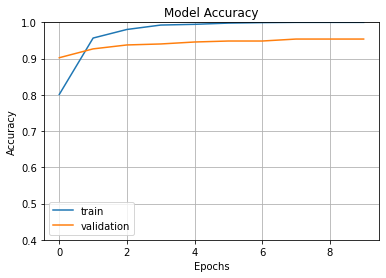

In [ ]:
# training and validation accuracy

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

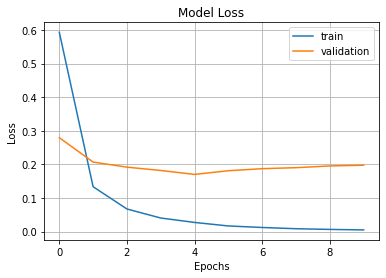

In [ ]:
# training and validation loss

fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# import prediction folder
import glob
import cv2
import os

cv_img = []
file_names = []

# loop each file and add it to cv_img
for img in glob.glob("prediction/*.jpg"):
    n= cv2.imread(img)
    image_resized= cv2.resize(n, (img_height,img_width))
    image=np.expand_dims(image_resized,axis=0)
    cv_img.append(image)
    file_names.append(os.path.basename(img))

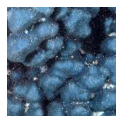

actual file name : Cyphastrea microphthalma042.jpg
This image most likely belongs to cyphastrea_microphthalma with a 91.14 percent confidence.


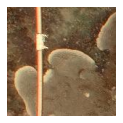

actual file name : Pachyseris speciosa074.jpg
This image most likely belongs to pachyseris_speciosa with a 97.86 percent confidence.


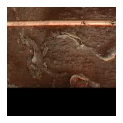

actual file name : Pachyseris speciosa056.jpg
This image most likely belongs to pachyseris_speciosa with a 97.64 percent confidence.


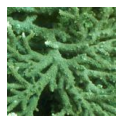

actual file name : Acropora clathrata008.jpg
This image most likely belongs to acropora_clathrata with a 100.00 percent confidence.


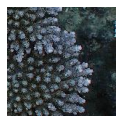

actual file name : acropora florida198.jpg
This image most likely belongs to acropora_florida with a 100.00 percent confidence.


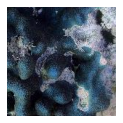

actual file name : Cyphastrea microphthalma039.jpg
This image most likely belongs to cyphastrea_microphthalma with a 100.00 percent confidence.


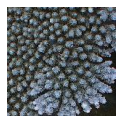

actual file name : acropora florida027.jpg
This image most likely belongs to acropora_florida with a 99.80 percent confidence.


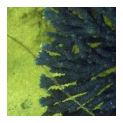

actual file name : Acropora clathrata020.jpg
This image most likely belongs to acropora_clathrata with a 100.00 percent confidence.


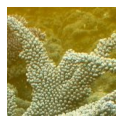

actual file name : acropora florida001.jpg
This image most likely belongs to acropora_florida with a 54.01 percent confidence.


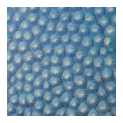

actual file name : Diploastrea heliopora222.jpg
This image most likely belongs to acropora_florida with a 98.90 percent confidence.


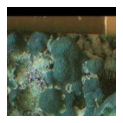

actual file name : Cyphastrea microphthalma076.jpg
This image most likely belongs to cyphastrea_microphthalma with a 98.71 percent confidence.


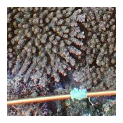

actual file name : acropora florida053.jpg
This image most likely belongs to acropora_florida with a 100.00 percent confidence.


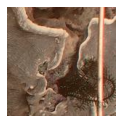

actual file name : Pachyseris speciosa068.jpg
This image most likely belongs to pachyseris_speciosa with a 99.33 percent confidence.


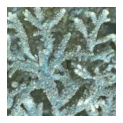

actual file name : Acropora clathrata023.jpg
This image most likely belongs to acropora_clathrata with a 100.00 percent confidence.


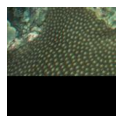

actual file name : Diploastrea heliopora253.jpg
This image most likely belongs to diploastrea_heliopora with a 100.00 percent confidence.


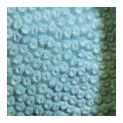

actual file name : Diploastrea heliopora206.jpg
This image most likely belongs to diploastrea_heliopora with a 98.77 percent confidence.


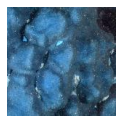

actual file name : Cyphastrea microphthalma078.jpg
This image most likely belongs to cyphastrea_microphthalma with a 100.00 percent confidence.


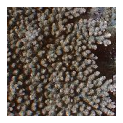

actual file name : acropora florida110.jpg
This image most likely belongs to acropora_florida with a 99.99 percent confidence.


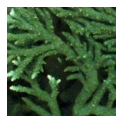

actual file name : Acropora clathrata076.jpg
This image most likely belongs to acropora_clathrata with a 100.00 percent confidence.


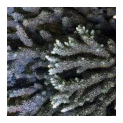

actual file name : Acropora clathrata001.jpg
This image most likely belongs to acropora_clathrata with a 100.00 percent confidence.


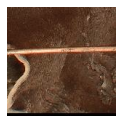

actual file name : Pachyseris speciosa069.jpg
This image most likely belongs to pachyseris_speciosa with a 99.99 percent confidence.


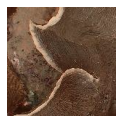

actual file name : Pachyseris speciosa045.jpg
This image most likely belongs to pachyseris_speciosa with a 100.00 percent confidence.


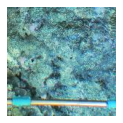

actual file name : Cyphastrea microphthalma048.jpg
This image most likely belongs to cyphastrea_microphthalma with a 95.70 percent confidence.


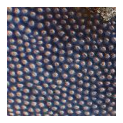

actual file name : Diploastrea heliopora212.jpg
This image most likely belongs to diploastrea_heliopora with a 99.73 percent confidence.


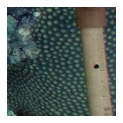

actual file name : Diploastrea heliopora261.jpg
This image most likely belongs to diploastrea_heliopora with a 100.00 percent confidence.


In [ ]:
# image prediction

from matplotlib.pyplot import figure

index = 0
for img in cv_img:
    figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()
    prediction = resnet_model.predict(img)
    output_class = class_names[np.argmax(prediction)]
    percentage = 100 * np.max(prediction)
    print("actual file name : " + file_names[index])
    index+=1
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(output_class, percentage)
    )

In [ ]:
# image prediction

from matplotlib.pyplot import figure

index = 0
for img in cv_img:
    prediction = resnet_model.predict(img)
    output_class = class_names[np.argmax(prediction)]
    percentage = 100 * np.max(prediction)
    print("actual file name : " + file_names[index])
    index+=1
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(output_class, percentage)
    )

actual file name : Cyphastrea microphthalma042.jpg
This image most likely belongs to cyphastrea_microphthalma with a 91.14 percent confidence.
actual file name : Pachyseris speciosa074.jpg
This image most likely belongs to pachyseris_speciosa with a 97.86 percent confidence.
actual file name : Pachyseris speciosa056.jpg
This image most likely belongs to pachyseris_speciosa with a 97.64 percent confidence.
actual file name : Acropora clathrata008.jpg
This image most likely belongs to acropora_clathrata with a 100.00 percent confidence.
actual file name : acropora florida198.jpg
This image most likely belongs to acropora_florida with a 100.00 percent confidence.
actual file name : Cyphastrea microphthalma039.jpg
This image most likely belongs to cyphastrea_microphthalma with a 100.00 percent confidence.
actual file name : acropora florida027.jpg
This image most likely belongs to acropora_florida with a 99.80 percent confidence.
actual file name : Acropora clathrata020.jpg
This image most

In [ ]:
resnet_model.save("model")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(resnet_model)
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
pwd

'/content'